# **The Small Long: Real Estate Multi Regression Project**

The primary objective is to develop and validate a robust, interpretable, multiple linear regression model for predicting real estate SalePrice.

The goal is achieved by:

1. Optimizing Predictors: Rigorously transforming and filtering features (like lot area, square footage, and age) to manage multicollinearity (removing highly correlated variables like TotalBsmtSF and TotRmsAbvGrd).

2. Model Building: Employing Standardized Linear Regression on selected features to establish a predictive relationship between property characteristics and SalePrice.

3. Validating Investment Value: Using hypothesis testing to formally prove the statistically significant, independent price impact of key features like Central Air and Remodeling Status.

The final output provides both a predictive tool and data-driven investment rules derived from validated coefficients.

### **Data Collection**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
housingPrices = pd.read_csv("Data/Housing_Prices_24.csv")
housingPrices.head(5)

,Id,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,...,PoolArea,LotConfig,BldgType,YearBuilt,YearRemodAdd,Foundation,CentralAir,KitchenQual,PavedDrive,YrSold
0,1,208500,8450,856,856,854,2,1,3,8,...,0,Inside,1Fam,2003,2003,PConc,Y,Gd,Y,2008
1,2,181500,9600,1262,1262,0,2,0,3,6,...,0,FR2,1Fam,1976,1976,CBlock,Y,TA,Y,2007
2,3,223500,11250,920,920,866,2,1,3,6,...,0,Inside,1Fam,2001,2002,PConc,Y,Gd,Y,2008
3,4,140000,9550,756,961,756,1,0,3,7,...,0,Corner,1Fam,1915,1970,BrkTil,Y,Gd,Y,2006
4,5,250000,14260,1145,1145,1053,2,1,4,9,...,0,FR2,1Fam,2000,2000,PConc,Y,Gd,Y,2008


In [5]:
housingPrices.tail(5)

,Id,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,...,PoolArea,LotConfig,BldgType,YearBuilt,YearRemodAdd,Foundation,CentralAir,KitchenQual,PavedDrive,YrSold
1455,1456,175000,7917,953,953,694,2,1,3,7,...,0,Inside,1Fam,1999,2000,PConc,Y,TA,Y,2007
1456,1457,210000,13175,1542,2073,0,2,0,3,7,...,0,Inside,1Fam,1978,1988,CBlock,Y,TA,Y,2010
1457,1458,266500,9042,1152,1188,1152,2,0,4,9,...,0,Inside,1Fam,1941,2006,Stone,Y,Gd,Y,2010
1458,1459,142125,9717,1078,1078,0,1,0,2,5,...,0,Inside,1Fam,1950,1996,CBlock,Y,Gd,Y,2010
1459,1460,147500,9937,1256,1256,0,1,1,3,6,...,0,Inside,1Fam,1965,1965,CBlock,Y,TA,Y,2008


The data was sourced from kaggle and provided by the course. From the scenario provided by the course, this data is sourced from a real estate investor who sampled housing prices from 2006 to 2010. There are 1460 samples. We are considering SalePrice to be the label. Subsequently, there are 25 features with varying data types. Many of the features, like 1stFlrSF and FullBath are numerical. Other features, like CentralAir and PavedDrive are binary enconded with a N or Y rather than 0 or 1. Another type is KitchenQual, which is an ordinal catigorical variable. LotConfig, BldgType, and Foundation are non-ordinal categorical variables.

A potential limitation to consider is convenience bias. Since the sampling was conducted by a single local real estate investor, it is possible that the houses were selected based on convenience: those that were easiest for the investor to access. Undercoverage bias should also be considered, as the term “local” is not clearly defined and may refer to only a subset of neighborhoods or regions within the area. Without a clear definition of what qualifies as “local,” certain types of homes or communities may be unintentionally excluded from the dataset. Furthermore, because the houses are not labeled with their specific addresses or locations, it is difficult to assess how well the sample represents the full range of homes in the local housing market. This uncertainty raises concerns about whether the dataset truly reflects the population of interest.

Another limitation is the simplification or omission of key variables. Important market factors such as interest rates and unemployment rates, which can strongly influence home prices, are missing from this dataset. Other influential variables like neighborhood reputation, school ratings, distance to amenities, and crime rates are also excluded.

Lastly, the dataset may be outdated if the investor’s goal is to make inferences about current properties. The housing market has changed significantly in recent years due to factors like inflation and the COVID-19 pandemic, which means data from 2006–2010 may not reflect present market conditions.


### **Data Exploration and Preparation**

In [27]:
housingPrices.describe()

,Id,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YearBuilt,YearRemodAdd,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,180921.195890,10516.828082,1057.429452,1162.626712,346.992466,1.565068,0.382877,2.866438,6.517808,...,1.767123,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,1971.267808,1984.865753,2007.815753
std,421.610009,79442.502883,9981.264932,438.705324,386.587738,436.528436,0.550916,0.502885,0.815778,1.625393,...,0.747315,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,30.202904,20.645407,1.328095
min,1.000000,34900.000000,1300.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,365.750000,129975.000000,7553.500000,795.750000,882.000000,0.000000,1.000000,0.000000,2.000000,5.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1954.000000,1967.000000,2007.000000
50%,730.500000,163000.000000,9478.500000,991.500000,1087.000000,0.000000,2.000000,0.000000,3.000000,6.000000,...,2.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1973.000000,1994.000000,2008.000000
75%,1095.250000,214000.000000,11601.500000,1298.250000,1391.250000,728.000000,2.000000,1.000000,3.000000,7.000000,...,2.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,2004.000000,2009.000000
max,1460.000000,755000.000000,215245.000000,6110.000000,4692.000000,2065.000000,3.000000,2.000000,8.000000,14.000000,...,4.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,2010.000000,2010.000000,2010.000000


We can see that columns LotConfig, BldgType, and Foundation are nonordinal variables.

In [3]:
print(f"Percent of KitchenQual that are missing values: {(housingPrices['KitchenQual']=='TA').sum()/len(housingPrices)*100}")

Percent of KitchenQual that are missing values: 50.34246575342466


Since we are running a regression, and we need ordinal or numerical variables, we can remove non-ordinal columns. We can also see that 50% of the values for KitchenQual are missing, so we can also remove this column. We can also drop the Id column since we can simply index the rows and the Id has no relation to SalePrice. Next, we want to convert binary variables such as centralAir or pavedDrive to numerical binary. We can also change variables that are presented with area data, but many of the rows are 0 since these features are luxury features. These variables we can convert to binary

In [4]:
cleaned_housing = housingPrices.drop(columns=['LotConfig','BldgType','Foundation','KitchenQual','Id'])
cleaned_housing['CentralAir'] = cleaned_housing['CentralAir'].map({'Y':1, 'N':0})
cleaned_housing['PavedDrive'] = cleaned_housing['PavedDrive'].map({'Y':1, 'N':0})
for col in ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']:
    cleaned_housing[col] = (cleaned_housing[col] > 0).astype(int)
cleaned_housing.head(5)

,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,YrSold
0,208500,8450,856,856,854,2,1,3,8,0,...,1,0,0,0,0,2003,2003,1,1.0,2008
1,181500,9600,1262,1262,0,2,0,3,6,1,...,0,0,0,0,0,1976,1976,1,1.0,2007
2,223500,11250,920,920,866,2,1,3,6,1,...,1,0,0,0,0,2001,2002,1,1.0,2008
3,140000,9550,756,961,756,1,0,3,7,1,...,1,1,0,0,0,1915,1970,1,1.0,2006
4,250000,14260,1145,1145,1053,2,1,4,9,1,...,1,0,0,0,0,2000,2000,1,1.0,2008


In [5]:
cleaned_housing['Age'] = cleaned_housing['YrSold'] - cleaned_housing['YearBuilt']
cleaned_housing['RemodAge'] = cleaned_housing['YrSold'] - cleaned_housing['YearRemodAdd']
cleaned_housing

,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,...,3SsnPorch,ScreenPorch,PoolArea,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,YrSold,Age,RemodAge
0,208500,8450,856,856,854,2,1,3,8,0,...,0,0,0,2003,2003,1,1.0,2008,5,5
1,181500,9600,1262,1262,0,2,0,3,6,1,...,0,0,0,1976,1976,1,1.0,2007,31,31
2,223500,11250,920,920,866,2,1,3,6,1,...,0,0,0,2001,2002,1,1.0,2008,7,6
3,140000,9550,756,961,756,1,0,3,7,1,...,0,0,0,1915,1970,1,1.0,2006,91,36
4,250000,14260,1145,1145,1053,2,1,4,9,1,...,0,0,0,2000,2000,1,1.0,2008,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,7917,953,953,694,2,1,3,7,1,...,0,0,0,1999,2000,1,1.0,2007,8,7
1456,210000,13175,1542,2073,0,2,0,3,7,2,...,0,0,0,1978,1988,1,1.0,2010,32,22
1457,266500,9042,1152,1188,1152,2,0,4,9,2,...,0,0,0,1941,2006,1,1.0,2010,69,4
1458,142125,9717,1078,1078,0,1,0,2,5,0,...,0,0,0,1950,1996,1,1.0,2010,60,14


Next we want to find the correlation of these variables against SalePrice and filter out the columns with very low correlations (correlations below or equal to 0.3).

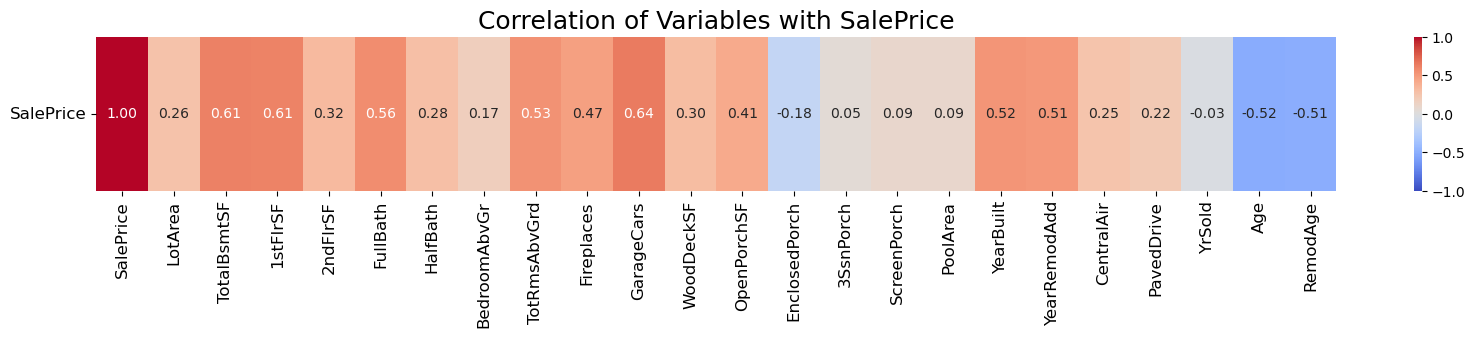

In [6]:
corr = cleaned_housing.corr()
saleprice_row = corr.loc[['SalePrice']]

plt.figure(figsize=(20, 2))
sns.heatmap(saleprice_row, annot=True, cmap='coolwarm', fmt=".2f",
            vmin=-1, vmax=1)

plt.title('Correlation of Variables with SalePrice', size=18)
plt.yticks(rotation=0, size=12) 
plt.xticks(size=12) # keep SalePrice label readable
plt.show()

In [7]:
cleaned_housing = cleaned_housing.drop(columns=['LotArea','HalfBath','BedroomAbvGr','WoodDeckSF','EnclosedPorch', 'ScreenPorch', '3SsnPorch','PoolArea','CentralAir','PavedDrive','YrSold'])
cleaned_housing.head(5)

,SalePrice,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF,YearBuilt,YearRemodAdd,Age,RemodAge
0,208500,856,856,854,2,8,0,2,1,2003,2003,5,5
1,181500,1262,1262,0,2,6,1,2,0,1976,1976,31,31
2,223500,920,920,866,2,6,1,2,1,2001,2002,7,6
3,140000,756,961,756,1,7,1,3,1,1915,1970,91,36
4,250000,1145,1145,1053,2,9,1,3,1,2000,2000,8,8


Next, we examine the pairwise correlations between all variables to avoid multicollinearity in our regression model. If two variables are correlated above 0.8, we’ll drop one of them since they’re likely capturing the same information and could distort our coefficient estimates. If a variable is highly correlated with several others, we’ll remove it altogether so it doesn’t overly influence the model or reduce the reliability of our results.

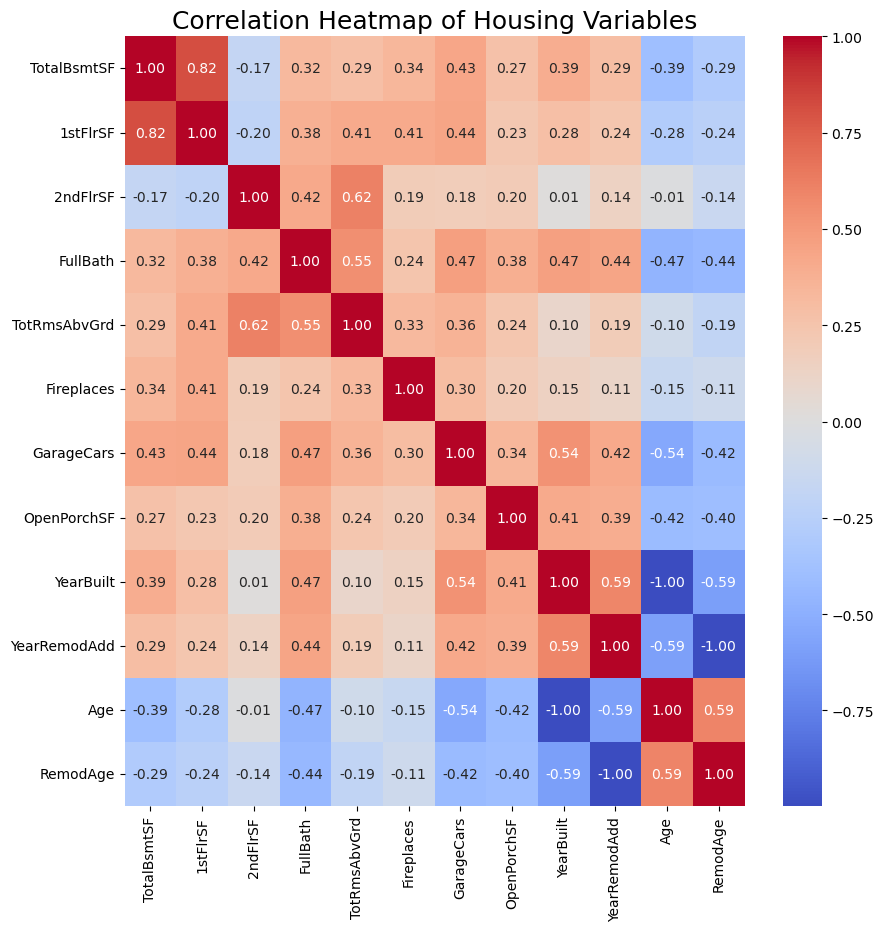

In [8]:
corr2 = cleaned_housing.drop(columns=['SalePrice']).corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Housing Variables', size=18)
plt.show()

Using the logic above, we will drop TotRmsAbvGrd and TotalBsmtSF. TotRmsAbvGrd has a correlation with 1stFlrSF above 0.8, and TotalBsmtSF is highly correlated with multiple other variables.

In [9]:
cleaned_housing = cleaned_housing.drop(columns=['TotRmsAbvGrd','TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'RemodAge'])
cleaned_housing.head(5)

,SalePrice,1stFlrSF,2ndFlrSF,FullBath,Fireplaces,GarageCars,OpenPorchSF,Age
0,208500,856,854,2,0,2,1,5
1,181500,1262,0,2,1,2,0,31
2,223500,920,866,2,1,2,1,7
3,140000,961,756,1,1,3,1,91
4,250000,1145,1053,2,1,3,1,8


### **Regression Model**

We used multiple linear regression because SalePrice depends on several factors at once, and this approach lets us estimate each feature’s effect while holding the others constant. Our final predictors capture simple, easy-to-understand drivers of home value: size (1stFlrSF, 2ndFlrSF), amenities (FullBath, Fireplaces, GarageCars, OpenPorchSF), and age (Age). We picked these because they explain price well without repeating the same information across highly overlapping variables.

In [10]:
from sklearn.linear_model import LinearRegression

train_set = cleaned_housing.sample(frac=0.9)
test_set = cleaned_housing.drop(train_set.index)

y_train = train_set['SalePrice']
X_train = train_set.drop(columns=['SalePrice'])

y_test = test_set['SalePrice']
X_test = test_set.drop(columns=['SalePrice'])

lr_non_norm = LinearRegression(fit_intercept=True)
lr_non_norm.fit(X_train, y_train)

# R-squared: how well the model explains variation in SalePrice
r2_non_norm_train = lr_non_norm.score(X_train, y_train)
r2_non_norm_test = lr_non_norm.score(X_test, y_test)
print('R squared train non-norm:', r2_non_norm_train, 'R squared test non-norm:', r2_non_norm_test)

# make a table of the linear model coefficients
coefs = pd.DataFrame(
    lr_non_norm.coef_,
    index=lr_non_norm.feature_names_in_,
    columns=['coefficient vals']
)
coefs

R squared train non-norm: 0.7096736363705876 R squared test non-norm: 0.7614333945257392


,coefficient vals
1stFlrSF,98.612153
2ndFlrSF,65.724110
FullBath,-3375.551315
Fireplaces,12636.826823
GarageCars,20309.040344
OpenPorchSF,7649.813905
Age,-662.831892


The model above regresses non-normalized SalePrice on all the other non-normalized selected explainantory variables. To see the impact of each explainantory varaible on SalePrice more clearly, we normalize the variables using the code below and construct a second regression model using the noramlized variables. 

In [11]:
def zscore(col):
    return (col - col.mean()) / col.std()

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

train_set_normed = cleaned_housing.sample(frac=0.9)
test_set_normed = cleaned_housing.drop(train_set_normed.index)

y_train_normed = train_set_normed['SalePrice']
X_train_normed = train_set_normed.drop(columns=['SalePrice']).apply(zscore)

y_test_normed = test_set_normed['SalePrice']
X_test_normed = test_set_normed.drop(columns=['SalePrice']).apply(zscore)

lr_normed = LinearRegression(fit_intercept=True)
lr_normed.fit(X_train_normed, y_train_normed)

# R-squared: how well the model explains variation in SalePrice
r2_normed_train = lr_normed.score(X_train_normed, y_train_normed)
r2_normed_test = lr_normed.score(X_test_normed, y_test_normed)
print('R squared train normed:', r2_normed_train, 'R squared test normed:', r2_normed_test)

# make a table of the linear model coefficients
coefs_normed = pd.DataFrame(
    lr_normed.coef_,
    index=lr_normed.feature_names_in_,
    columns=['coefficient vals']
)
coefs_normed

R squared train normed: 0.7127215637644184 R squared test normed: 0.7379110665795954


,coefficient vals
1stFlrSF,37806.903032
2ndFlrSF,28789.907886
FullBath,-1468.700543
Fireplaces,8015.583393
GarageCars,15692.821506
OpenPorchSF,3342.047712
Age,-20142.956304


From our normalized multiple linear regression, the largest absolute coefficients are 1stFlrSF and 2ndFlrSF, followed by Age/YearBuilt-related variables, GarageCars, and Fireplaces. FullBath and OpenPorchSF have much smaller coefficients in absolute value, suggesting they add less predictive power once the major size and age effects are already accounted for. Overall, our final model using 1stFlrSF, 2ndFlrSF, FullBath, Fireplaces, GarageCars, OpenPorchSF, and Age explains a meaningful share of price variation, with R² ≈ 0.71 (train) and ≈ 0.74 (test).

A key takeaway is that FullBath behaves unexpectedly. It shows a negative coefficient in the multiple regression even though it has a positive correlation with SalePrice in our earlier heatmap. We want to investigate further.

Text(0.5, 1.0, 'FullBath vs SalePrie Regression Line')

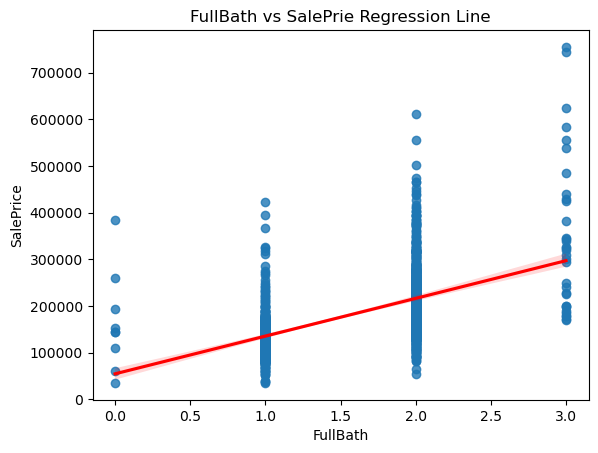

In [13]:
sns.regplot(data=cleaned_housing, x='FullBath', y='SalePrice', line_kws={"color": "red"})
plt.title('FullBath vs SalePrie Regression Line')

From the scatterplot of FullBath vs SalePrice, we see a clear positive pattern: houses with more full bathrooms tend to sell for higher prices on average. However, in our multiple regression model, the coefficient on FullBath becomes negative.

This happens because the regression is not just looking at the simple relationship between FullBath and SalePrice. Instead, it estimates the effect of FullBath while holding all the other predictors constant, especially other size-related variables such as 1stFlrSF, TotalBsmtSF, Bedrooms, and GarageCars. These variables are all positively correlated with both FullBath and SalePrice, so they already explain most of the “bigger house correlates to higher price” pattern.

After controlling for those other features, FullBath no longer represents “overall house size” and instead captures only the remaining variation. In this setting, the model can assign a slightly negative coefficient to FullBath, even though its simple (uncontrolled) relationship with SalePrice is positive. This is an example of a suppression effect due to multicollinearity: several predictors are explaining the same underlying concept, so the individual coefficients become harder to interpret on their own.

To take a closer look at multicollinearity in our model, we calculated variance inflation factors (VIFs) for each predictor. VIF tells us how much a coefficient’s variability is inflated when a variable overlaps with other predictors. As a rule of thumb, VIF > 5 suggests moderate multicollinearity and VIF > 10 suggests severe multicollinearity, so VIF helps us identify which variables may be carrying similar information.

In [14]:
# Calculate VIF for each numerical feature 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = cleaned_housing.drop('SalePrice', axis=1).columns

# Calculate VIF and round to 4 decimal places
vif_data["VIF"] = [round(variance_inflation_factor(
    cleaned_housing.drop('SalePrice', axis=1).values, i), 4) for i in range(
    cleaned_housing.drop(columns='SalePrice').shape[1])]

# Sort VIF values in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif_data)

       feature      VIF
0     1stFlrSF  18.7859
2     FullBath  15.7457
4   GarageCars  10.1598
1     2ndFlrSF   2.9817
5  OpenPorchSF   2.9033
3   Fireplaces   2.5383
6          Age   2.2587


Our results suggest that multicollinearity is mainly coming from 1stFlrSF (18.79), FullBath (15.75), and GarageCars (10.16), while the other predictors have much lower VIFs. This overlap may help explain why FullBath showed “weird” behavior in our regression results. Its coefficient can be less reliable because it shares so much information with other closely related predictors. However, we need further investigation before removing anything, since a high VIF doesn’t automatically mean a variable is unhelpful if it improves prediction of SalePrice. For now, we’re using VIF as a flag for overlap and a reminder of what to interpret cautiously. It also gives us an idea for a follow up project later.

### **Hypothesis Test (A/B testing on CentralAir)**

Earlier in our data cleaning, we dropped CentralAir because it did not show a strong correlation with SalePrice. To check whether that choice was reasonable, we ran an A/B test comparing SalePrice for homes with versus without central air to see if the average prices differ.

- Null hypothesis (H₀): The mean SalePrice is the same for homes with central air and without central air.

- Alternative hypothesis (Hₐ): The mean SalePrice is different between the two groups (two-sided).

- **Test statistic: The two-sample t-statistic, which compares the difference in the two groups’ mean SalePrice to the expected variation in that difference due to sampling.**

In [23]:
observed_mean_diff_CentralAir = group_yes.mean() - group_no.mean()
observed_mean_diff_CentralAir

np.float64(80922.63620589937)

In [15]:
AB_test_subset = housingPrices[['SalePrice','CentralAir']].copy()
AB_test_subset['CentralAir'] = AB_test_subset['CentralAir'].map({'Y':1, 'N':0})
AB_test_subset

,SalePrice,CentralAir
0,208500,1
1,181500,1
2,223500,1
3,140000,1
4,250000,1
...,...,...
1455,175000,1
1456,210000,1
1457,266500,1
1458,142125,1


In [16]:
group_yes = AB_test_subset[AB_test_subset['CentralAir'] == 1]['SalePrice']
group_no  = AB_test_subset[AB_test_subset['CentralAir'] == 0]['SalePrice']

In [17]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(group_yes, group_no)
t_stat, p_value


(np.float64(9.914905121389344), np.float64(1.8095061559266025e-22))

Using a t-test comparing SalePrice for houses with and without CentralAir, we found a statistically significant difference (t ≈ 9.91, p ≈ 1.81×10⁻²²). According to our dataset, homes with central air sold for about $80,923 more on average. However, statistical significance does not necessarily mean CentralAir is one of the strongest drivers of price. Its impact may be relatively small compared to major predictors like overall size and age, so we interpret this result as evidence of a real difference while still weighing its importance against other variables in the full model.

### **Hypothesis Test (Remodeled vs. Never Remodeled)**

Now, we want to use a simulation-based test to see whether being remodeled is associated with a difference in average SalePrice. Our original dataset only includes YearBuilt and YearRemodAdd, but those variables mainly tell us when a remodel happened, not whether remodeling itself is linked to higher prices. This test lets us answer that question directly. Our method is to repeatedly randomize which houses are labeled “remodeled” versus “not remodeled,” recalculate the difference in mean SalePrice each time, and then see how often the simulated differences are at least as extreme as the observed difference to obtain a p-value.


- Null hypothesis: mean remodeled SalePrice − mean never-remodeled SalePrice = 0

- Alternative hypothesis (Hₐ): mean remodeled SalePrice − mean never-remodeled SalePrice > 0

- Test statistic: mean(SalePrice for remodeled homes) − mean(SalePrice for never-remodeled homes)

In [19]:
housingPrices['IsRemodeled'] = housingPrices['YearRemodAdd'] > housingPrices['YearBuilt']
remodeled = housingPrices[housingPrices['IsRemodeled'] == True]['SalePrice']
not_remodeled = housingPrices[housingPrices['IsRemodeled'] == False]['SalePrice']

In [20]:
observed_mean_diff = remodeled.mean() - not_remodeled.mean()
mean_diff

np.float64(80922.63620589937)

p value: 0.7989


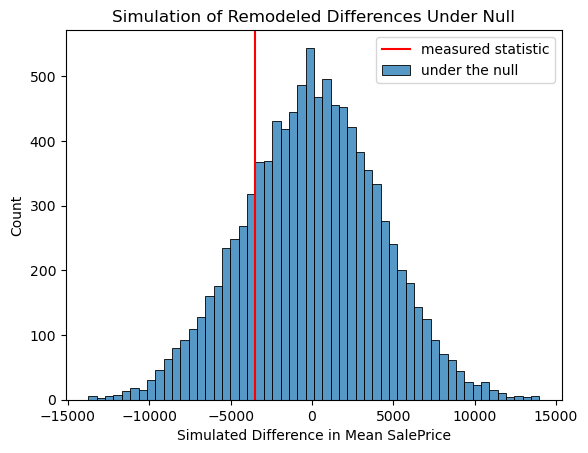

In [24]:
import random 
import numpy as np

all_prices = cleaned_housing['SalePrice'].values

statistic = pd.DataFrame(columns=['Simulated_Diff'])

for simulation in range(10000):
    np.random.shuffle(all_prices)
    n_remodeled = len(remodeled)
    sim_remodeled = all_prices[:n_remodeled]
    sim_original = all_prices[n_remodeled:]
    sim_test_statistic = sim_remodeled.mean() - sim_original.mean()
    
    statistic.loc[len(statistic)] = [sim_test_statistic]

simulated_diffs = statistic['Simulated_Diff'].values

p_value = np.mean(simulated_diffs >= observed_mean_diff)
print('p value:', p_value)

sns.histplot(simulated_diffs, label='under the null')
plt.axvline(
    observed_mean_diff, 
    color='red', label='measured statistic')
plt.title('Simulation of Remodeled Differences Under Null')
plt.xlabel('Simulated Difference in Mean SalePrice')
plt.legend()

With a p-value of 0.7989, we fail to reject the null hypothesis that remodeled and not-remodeled houses have the same average SalePrice. In other words, the difference we observed is very common under random shuffling, so our data does not provide evidence that remodeling increases SalePrice. As a real estate consultant, we would not recommend remodeling as a guaranteed strategy to raise sale price based on this dataset alone.

## Conclusion

In this project, we built a multiple linear regression model that predicts SalePrice fairly well (R² ≈ 0.71 train, 0.74 test).
We also found that house size and age are the strongest drivers of price. Our tests suggest CentralAir is linked to
higher prices, and remodeling has no reliable effect in our simulation. We discovered multicollinearity (especially
among size-related features) that helps explain FullBath’s unexpected negative coefficient. This motivates a follow-up
analysis. As a real estate consultant, we recommend prioritizing usable living space and high-impact features such as
fireplaces and garages.

## Meeting Tracker

- 10/27 Davis: Melissa Dylan Neha Vanessa
- 11/23 Daivs: Dylan Melissa
- 11/24 Davis : Dylan Melissa
- 11/30 Panera: Dylan Melissa